<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/PPG_Clustering/blob/main/revese_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
ppg_one_beat = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/p2p_beats/part_1_PPG_beats_P2P_Aug_2022.csv",
                           names = np.arange(120))

In [4]:
ppg_10_beats = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/10_beat_signals/part_1_PPG_signals_10_beats_Aug_2022.csv",names = np.arange(1024))


In [5]:
ppg_one_beat.head()


,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,1.00000,0.99971,0.99898,0.99602,0.99104,0.98427,0.97570,0.96534,0.95313,0.93891,...,0.86711,0.89480,0.91637,0.93424,0.95006,0.96290,0.97265,0.97946,0.98329,0.98515
1,1.00000,0.99986,0.99938,0.99671,0.99211,0.98582,0.97781,0.96817,0.95657,0.94259,...,0.87321,0.89588,0.91331,0.92665,0.93742,0.94541,0.95071,0.95352,0.95363,0.95355
2,1.00000,0.99805,0.99416,0.98829,0.98048,0.97107,0.96004,0.94735,0.93303,0.91708,...,0.83197,0.86486,0.89022,0.91013,0.92479,0.93626,0.94502,0.95083,0.95364,0.95499
3,0.91394,0.91331,0.91198,0.90826,0.90231,0.89456,0.88500,0.87378,0.86088,0.84626,...,0.86086,0.89582,0.92488,0.94820,0.96554,0.97851,0.98723,0.99360,0.99787,1.00000
4,0.91259,0.91280,0.91298,0.91087,0.90681,0.90120,0.89398,0.88514,0.87469,0.86219,...,0.91012,0.93643,0.95764,0.97392,0.98525,0.99285,0.99716,0.99942,0.99987,1.00000


In [6]:
ppg_10_beats.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.93827,0.93797,0.93668,0.93271,0.92657,0.91835,0.90804,0.89557,0.88077,0.86366,...,0.83921,0.87134,0.89890,0.92160,0.93962,0.95299,0.96284,0.96939,0.97306,0.97468
1,0.97918,0.97711,0.97282,0.96595,0.95673,0.94525,0.93125,0.91482,0.89634,0.87574,...,0.81925,0.85823,0.89068,0.91687,0.93754,0.95296,0.96399,0.97080,0.97323,0.97392
2,0.91117,0.91058,0.90876,0.90415,0.89734,0.88842,0.87828,0.86690,0.85514,0.83849,...,0.77387,0.81272,0.84544,0.87188,0.89287,0.90876,0.92067,0.92875,0.93312,0.93501
3,0.94427,0.94437,0.94375,0.94039,0.93489,0.92729,0.91784,0.90638,0.89254,0.87656,...,0.69776,0.74174,0.77864,0.80684,0.82829,0.84364,0.85592,0.86501,0.87067,0.87340
4,0.88354,0.88384,0.88364,0.88063,0.87566,0.86903,0.86046,0.84995,0.83731,0.82326,...,0.76663,0.80782,0.84318,0.87221,0.89548,0.91317,0.92619,0.93491,0.93986,0.94210


In [7]:
id = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/p2p_beats/part_1_Subj_ID_beats_P2P_Aug_2022.csv",names = ["ID"])
print("ID shape is ",id.shape)
id.head()

ID shape is  (154540, 1)


,ID
0,1
1,1
2,1
3,1
4,1


In [8]:
sys_df = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/p2p_beats/part_1_SYS_BP_beats_P2P_Aug_2022.csv",
                     names = ["sys"])
print("sys shape is ",sys_df.shape)
sys_df.head()

sys shape is  (154540, 1)


,sys
0,123.04
1,120.99
2,119.57
3,122.35
4,122.75


In [9]:
dia_df = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/p2p_beats/part_1_Dia_BP_beats_P2P_Aug_2022.csv",
                     names = ["dia"])
print("diastolic shape is ",dia_df.shape)
dia_df.head()

diastolic shape is  (154540, 1)


,dia
0,66.526
1,65.598
2,66.135
3,66.135
4,67.503


In [10]:
df_info = pd.DataFrame()
df_info["ID"] = id
df_info["sys"]  = sys_df
df_info["dia"]  = dia_df


In [11]:
df_info.head()


,ID,sys,dia
0,1,123.04,66.526
1,1,120.99,65.598
2,1,119.57,66.135
3,1,122.35,66.135
4,1,122.75,67.503


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


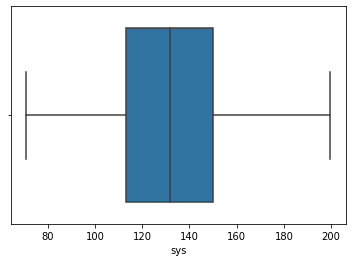

In [12]:
sns.boxplot(df_info["sys"])

In [26]:
exp_df_80_90 = ppg_one_beat.loc[df_info["sys"]<=90,:]
exp_df_80_90 = exp_df_80_90.loc[df_info["sys"]>=80,:]

In [27]:
exp_df_80_90

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
8010,0.94193,0.93824,0.93098,0.92035,0.90703,0.89154,0.87386,0.85412,0.83285,0.81102,...,0.84141,0.87740,0.90910,0.93606,0.95847,0.97626,0.98860,0.99613,0.99903,1.00000
8011,1.00000,0.99866,0.99542,0.98867,0.97922,0.96733,0.95311,0.93662,0.91794,0.89747,...,0.84461,0.87801,0.90739,0.93220,0.95259,0.96854,0.98004,0.98717,0.98944,0.98997
8012,0.91293,0.91020,0.90453,0.89520,0.88307,0.86846,0.85293,0.83660,0.81973,0.80148,...,0.88149,0.91294,0.93933,0.95948,0.97449,0.98465,0.99286,0.99840,0.99981,1.00000
8013,0.99020,0.98728,0.98138,0.97222,0.96024,0.94567,0.92895,0.91021,0.88992,0.86829,...,0.81881,0.85507,0.88773,0.91655,0.94124,0.96174,0.97790,0.98967,0.99667,1.00000
8014,0.92639,0.92601,0.92432,0.91874,0.91053,0.90015,0.88740,0.87239,0.85542,0.83669,...,0.87375,0.89897,0.92089,0.94210,0.96035,0.97521,0.98672,0.99471,0.99847,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154535,0.98688,0.98516,0.97601,0.95834,0.93464,0.90378,0.87171,0.83966,0.80615,0.76670,...,0.67815,0.74179,0.80264,0.85733,0.90495,0.94431,0.97319,0.99193,0.99987,1.00000
154536,0.89144,0.88426,0.87181,0.85498,0.83367,0.80629,0.77456,0.73982,0.70282,0.66467,...,0.62709,0.68798,0.74828,0.80651,0.85986,0.90649,0.94487,0.97258,0.99083,1.00000
154537,0.99926,1.00000,0.99675,0.98707,0.97036,0.94791,0.92054,0.88902,0.85419,0.81701,...,0.49595,0.55355,0.61122,0.66587,0.71373,0.75365,0.78706,0.81127,0.82620,0.83270
154538,0.99500,0.99583,0.99210,0.98155,0.96466,0.94111,0.91304,0.88135,0.84570,0.80910,...,0.67804,0.74179,0.80099,0.85554,0.90238,0.93968,0.96661,0.98442,0.99510,1.00000


In [15]:
!pip install tslearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 4.6 MB/s 


In [28]:
scaled_df = exp_df_80_90
import numpy


In [29]:

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance,  TimeSeriesResampler

seed = 0
numpy.random.seed(seed)
X_train = scaled_df.values #, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
#X_train = X_train[y_train < 4]  # Keep first 3 classes
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
# Make time series shorter
X_train = TimeSeriesResampler(sz=64).fit_transform(X_train)
sz = X_train.shape[1]

# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=8, verbose=True, random_state=seed)
y_pred_eucl = km.fit_predict(X_train)

Euclidean k-means
2.431 --> 1.836 --> 1.790 --> 1.711 --> 1.669 --> 1.664 --> 1.662 --> 1.661 --> 1.660 --> 1.660 --> 1.660 --> 1.660 --> 1.660 --> 


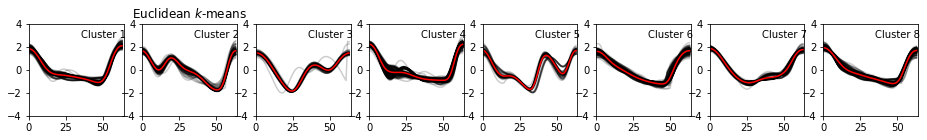

In [30]:
plt.figure(figsize=(20,20))
for yi in range(8):
    plt.subplot(10,10, yi + 1)
    for xx in X_train[y_pred_eucl == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

In [31]:
df_info_80_90 = df_info.loc[df_info["sys"]<=90,:]
df_info_80_90 = df_info_80_90.loc[df_info["sys"]>=80,:]


In [32]:
df_info_80_90.head()

,ID,sys,dia
8010,103,82.302,63.595
8011,103,82.840,63.937
8012,103,83.670,64.474
8013,103,83.670,64.718
8014,103,83.230,64.425


In [33]:
df_info_80_90["labels"] = y_pred_eucl

In [34]:
df_info_80_90.head()

,ID,sys,dia,labels
8010,103,82.302,63.595,5
8011,103,82.840,63.937,5
8012,103,83.670,64.474,5
8013,103,83.670,64.718,5
8014,103,83.230,64.425,5


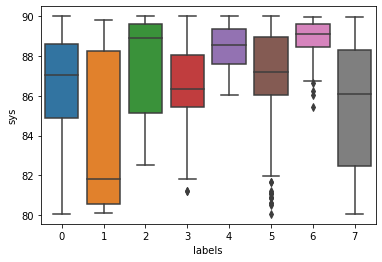

In [35]:
sns.boxplot(x = "labels",y="sys",data = df_info_80_90)

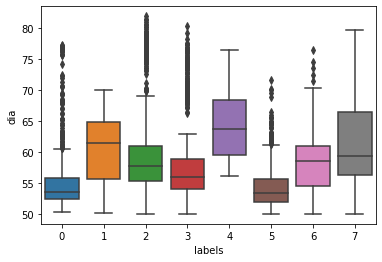

In [24]:
sns.boxplot(x = "labels",y="dia",data = df_info_80_100)

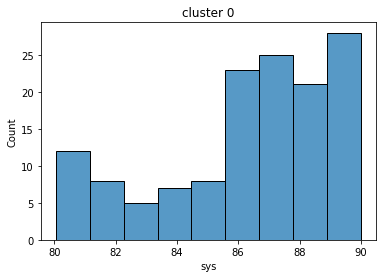

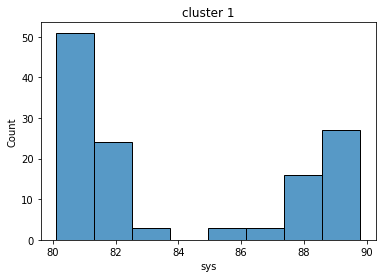

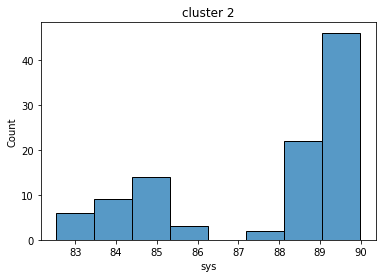

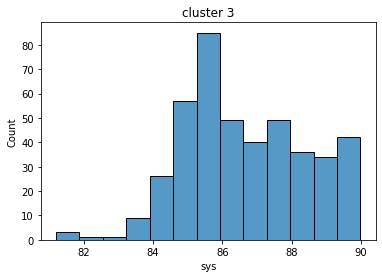

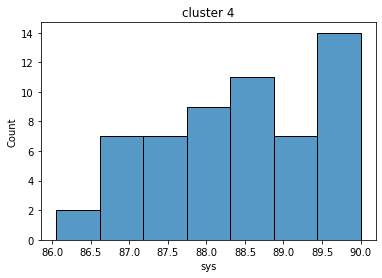

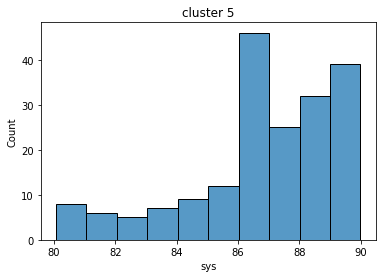

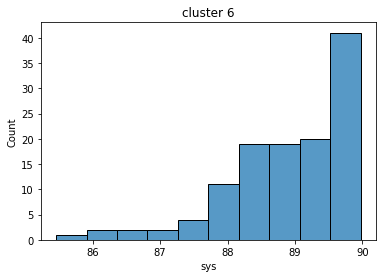

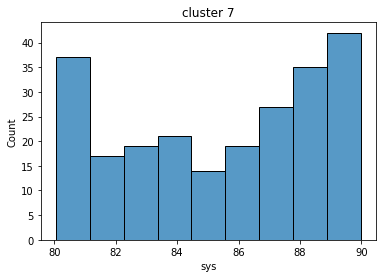

In [36]:
import seaborn as sns
for i in range(8):
  plt.figure()
  plt.title("cluster "+str(i))
  sns.histplot(x = df_info_80_90["sys"][df_info_80_90 ["labels"] == i]  )

In [ ]:
exp_df_100_110 = ppg_one_beat.loc[df_info["sys"]>=100,:]
exp_df_100_110 = exp_df_100_110.loc[df_info["sys"]<=110,:]

In [ ]:
scaled_df = exp_df_100_110

In [ ]:

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance,  TimeSeriesResampler

seed = 0
numpy.random.seed(seed)
X_train = scaled_df.values #, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
#X_train = X_train[y_train < 4]  # Keep first 3 classes

# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
# Make time series shorter
X_train = TimeSeriesResampler(sz=64).fit_transform(X_train)
sz = X_train.shape[1]

# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=8, verbose=True, random_state=seed)
y_pred_eucl_100_110 = km.fit_predict(X_train)

Euclidean k-means
2.228 --> 1.835 --> 1.776 --> 1.745 --> 1.722 --> 1.704 --> 1.693 --> 1.687 --> 1.683 --> 1.681 --> 1.679 --> 1.676 --> 1.672 --> 1.668 --> 1.665 --> 1.663 --> 1.662 --> 1.662 --> 1.661 --> 1.661 --> 1.661 --> 1.661 --> 1.661 --> 1.661 --> 1.661 --> 1.661 --> 1.661 --> 1.661 --> 1.661 --> 1.661 --> 1.661 --> 1.661 --> 1.661 --> 1.661 --> 1.661 --> 1.661 --> 1.661 --> 1.661 --> 1.661 --> 


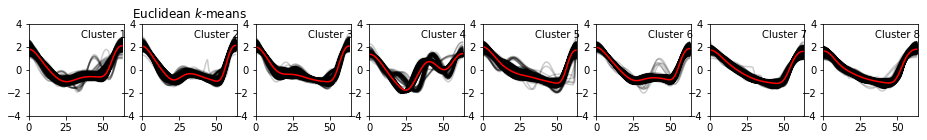

In [ ]:
plt.figure(figsize=(20,20))
for yi in range(8):
    plt.subplot(10,10, yi + 1)
    for xx in X_train[y_pred_eucl_100_110 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

In [ ]:
df_info_100_110 = df_info.loc[df_info["sys"]<=110,:]
df_info_100_110 = df_info_100_110.loc[df_info["sys"]>=100,:]

In [ ]:
df_info_100_110["labels"] = y_pred_eucl_100_110

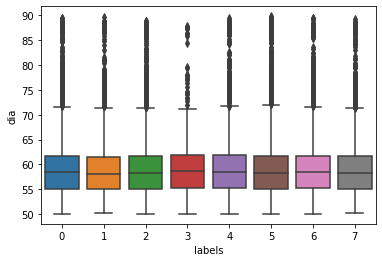

In [ ]:
sns.boxplot(x = "labels",y="dia",data = df_info_100_110)